In [ ]:
"""
Problem Statement : Build the Image classification model
Objectives : Build the Image classification model by dividing the model into following 4 stages:
                a. Loading and preprocessing the image data
                b. Defining the model‘s architecture
                c. Training the model
                d. Estimating the model‘s performance

About Dataset : Fashion MNIST is a drop-in replacement for the very well known, machine learning hello world –
                MNIST dataset which can be checked out at  ̳Identify the digits‘ practice problem. Instead of digits,
                the images show a type of apparel e.g. T-shirt, trousers, bag, etc.
----------------------------------------------------------------------------------------------------------------------------


Theory : CNN : 
              - Instead of the image, the computer sees an array of pixels. For example, if image size is 300 x 300.
                In this case, the size of the array will be 300x300x3. Where 300 is width, next 300 is height and 3 is
                RGB channel values. The computer is assigned a value from 0 to 255 to each of these numbers. This value describes the intensity of the pixel at each point.
              
              - Now, this image input is passed to convolutional layer. Reading of the input matrix starts from the top then based on the 
                filter size a smaller matrix is selected. 
              - Then the filter produces convolution, i.e. moves along the input image.
              - The filter’s task is to multiply its values(filter matrix) by the original pixel values.
              - All these multiplications are summed up. One number is obtained in the end.
              - Since the filter has read the image only in the upper left corner then 
                it moves further and further right by 1 unit (jump) performing a similar operation.
                
              - Finally , after passing the filter across all positions, a matrix is obtained, but smaller then a input matrix.
              - The network will consist of several convolutional networks mixed with nonlinear and pooling layers.
              - When the image passes through one convolution layer, the output of the first layer becomes the input for the second layer. And this happens with every further convolutional layer.

              - POOLING : this layer follows the nonlinear layer. 
                          It works with width and height of the image and performs a downsampling operation on them. 
                          As a result the image volume is reduced.
              - Now , convolution operation  --> non linear (activation function) ---> pooling ---> fully connected layer ---> output.
"""

In [3]:
!pip3 install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 11.3 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [22]:
# step1: import all the packages 
import keras
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [7]:
# 2. import the Fashion MNIST dataset 
fashion_mnist = tf.keras.datasets.fashion_mnist

# split data into train and test 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
# 3. define class labels or class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
print("training images set dimensions : {0}  and length of train labels: {1}".format(train_images.shape,len(train_labels)))

training images set dimensions : (60000, 28, 28)  and length of train labels: 60000


In [16]:
print("testing images set dimensions : {0}  and length of test labels: {1}".format(test_images.shape,len(test_labels)))

testing images set dimensions : (10000, 28, 28)  and length of test labels: 10000


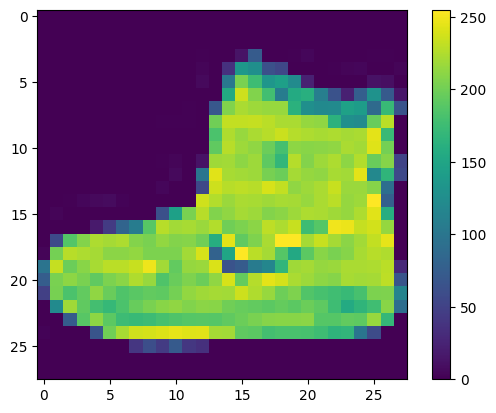

In [25]:
# plots the first image from the train image array.
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# now we need to predict what it is ?

In [26]:
# converting our train and test array to float
train_images = train_images / 255.0
test_images = test_images / 255.0


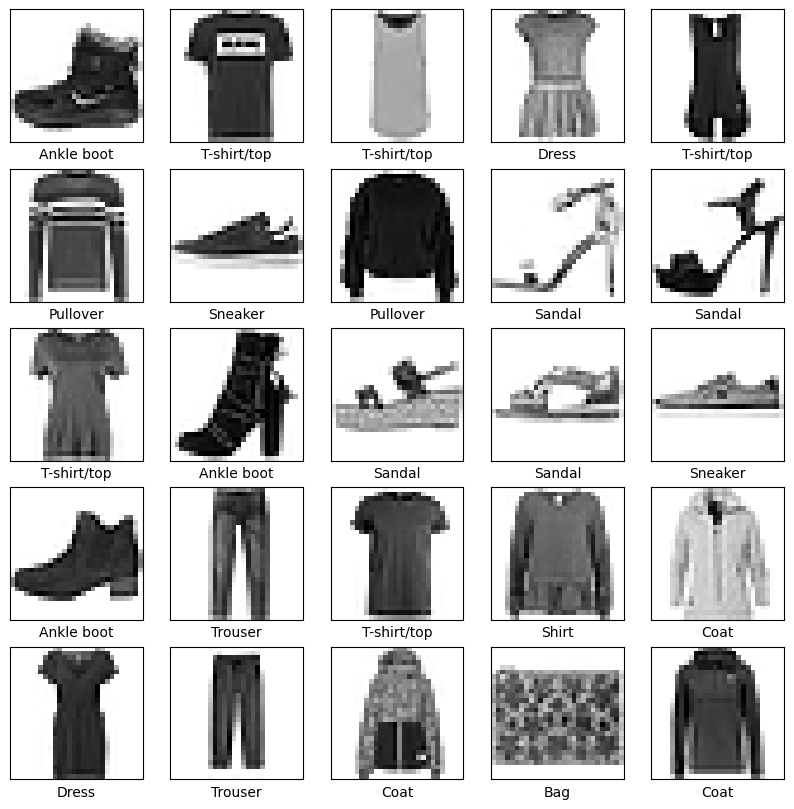

In [34]:

plt.figure(figsize=(10,10))
# iterates through the first 25 images in the training dataset
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]]) # This line adds a label below the image, which corresponds to the class name of the clothing item. It uses the train_labels[i] (the label index) to look up the class name from the class_names list.
plt.show()